# TECH-2 Term Paper
Group-07, Aayush Mohan Kolhe, Nils Lærum Harloff

## Task 1
### Loading in and concatenating data

In [1]:
#Import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import glob

#Set general data path readable by glob
DATA_PATH = './data' 
day_ahead_pattern = f'{DATA_PATH}/DayAheadPrices_12.1.D/*_DayAheadPrices_*.D.csv' 

# Initialize list to store data from each file
dayahead_data = [] 
for file in glob.glob(day_ahead_pattern):
    # Read each file
    d = pd.read_csv(file, sep="\t", parse_dates=['DateTime'], index_col='DateTime')
    
    # Filter rows to keep only those with hourly data and relevant map codes
    d = d[(d['ResolutionCode'] == 'PT60M') & (d['MapCode'].isin(['NO2', 'DE_LU']))]
    
    # Append to list
    dayahead_data.append(d)

# Concatenate all dataframes in list
all_prices_data = pd.concat(dayahead_data, axis=0)

## Task 1
### Creating the Graphs

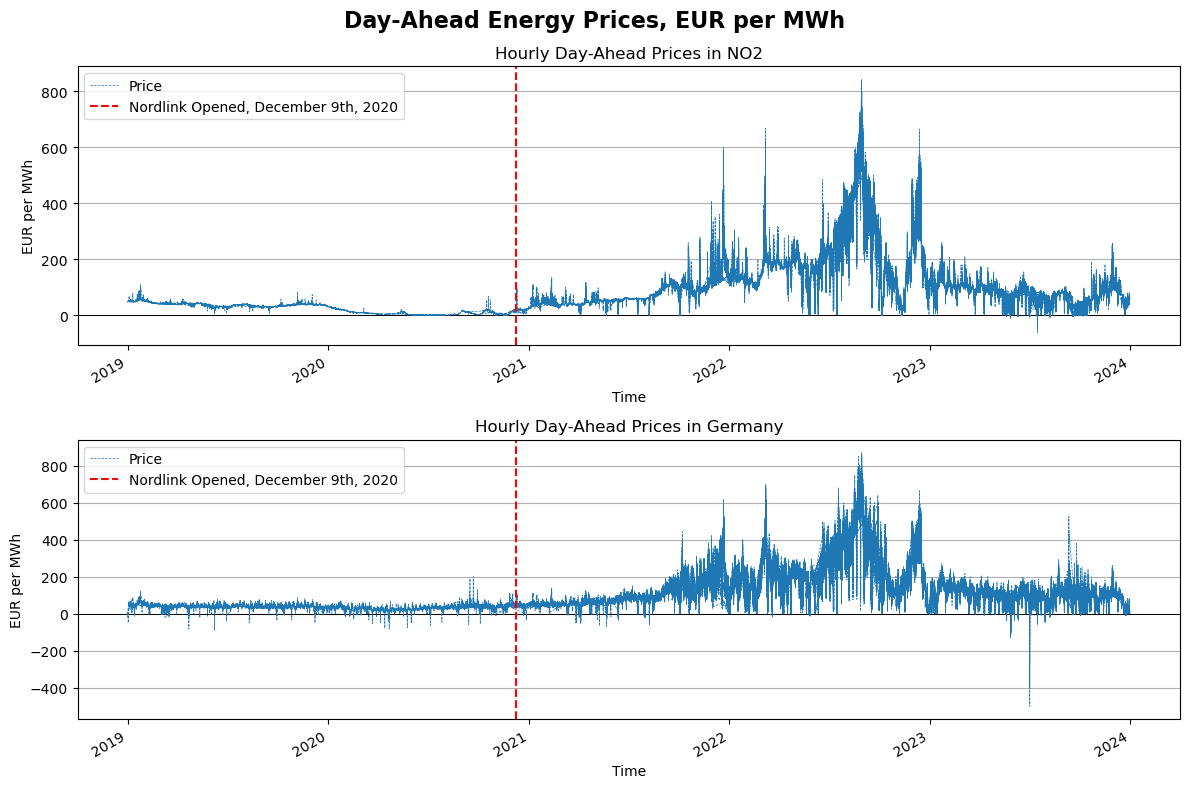

In [2]:
# Separate data for NO2 and DE_LU using .loc
dfno = all_prices_data.loc[all_prices_data['MapCode'] == 'NO2']
dfde = all_prices_data.loc[all_prices_data['MapCode'] == 'DE_LU']

# Create subplots using pyplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle("Day-Ahead Energy Prices, EUR per MWh",fontsize=16,fontweight="bold")

# NO2 Plot
ax1.axhline(y=0,color="black",lw=0.7) #Seperate zero-axis to emphasize when prices turn negative or are low
dfno['Price'].plot(ax=ax1, lw=0.5, ls='--', title="Hourly Day-Ahead Prices in NO2", xlabel='Time', ylabel='EUR per MWh')
ax1.axvline(pd.to_datetime("2020-12-09"), color='red', linestyle='--', label='Nordlink Opened, December 9th, 2020') # line showing December 9th, 2020 Nordlink opening
ax1.grid(axis="y")
ax1.legend()

# Germany Plot
ax2.axhline(y=0,color="black",lw=0.7) #Seperate zero-axis to emphasize when prices turn negative
dfde['Price'].plot(ax=ax2, lw=0.5, ls='--', title="Hourly Day-Ahead Prices in Germany", xlabel='Time', ylabel='EUR per MWh')
ax2.axvline(pd.to_datetime("2020-12-09"), color='red', linestyle='--', label='Nordlink Opened, December 9th, 2020') # line showing December 9th, 2020 Nordlink opening
ax2.grid(axis="y")
ax2.legend()

# Adjust layout and save the figure
plt.tight_layout()  # Adjust spacing between plots
plt.savefig('figure_task1.png', format='png', dpi=600)
plt.show()

### Conclusion
From the Graphs it seems visible that prior to the opening of the Nordlink, the variation or volatility of the index was not that high. However, after the opening of the nordlink connection, it seems that after a while both prices in NO2 and Germany increased in volatitity. The number of extreme values have also seemed to increase for both Germany and NO2. Particularly there is one extreme value in 2023 with a significant negative price in the German prices plot. Additionaly the prices also violently increased in the end of 2021 and the start of 2022. It seems that overall the prices have increased by a very large amount after the opening of the NordLink. 


One reason as to why electricity prices can be negative is due to renewable energy sources. Sometimes due to weather such as high winds, or high rainfall, the supply of electricty increases rapidly exceeding demand by a large amount leading to negative prices due to the imbalance.

## TASK 2
### Creating the Excel Table


In [3]:
# Made a copy to avoid problems faced with "SettingWithCopyWarning"
dfde = dfde.copy()
dfno = dfno.copy()

# Add a 'Year' column based on the DateTime index
# Use .loc to assign the 'Year' column explicitly and assign the year value to each entry
dfde.loc[:, 'Year'] = dfde.index.year
dfno.loc[:, 'Year'] = dfno.index.year

#Grouping each year together, then using .agg() to find the relevant statistics, making this into a dataframe
stats_no = dfno.groupby('Year')['Price'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
stats_no=stats_no.T #Transposing to place the Years as columns for readability
stats_no["Zone"]="NO2" #Labelling the data by the zone so it can be seen in the excel file

stats_de = dfde.groupby('Year')['Price'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
stats_de=stats_de.T
stats_de['Zone'] = 'Germany'

# Concatenate the two DataFrames
all_stats = pd.concat([stats_no, stats_de])

# Save to a single Excel file
all_stats.to_excel("table_task2.xlsx", index=True)

#Show Table here (Years were chosen as the columns as the wide format table was more readable for comparisons of changes over time)
all_stats

Year,2019,2020,2021,2022,2023,Zone
mean,39.26,9.29,75.11,211.28,79.44,NO2
median,38.81,6.95,59.34,181.13,80.46,NO2
std,8.23,8.26,47.22,125.85,36.28,NO2
min,5.86,-1.73,-1.97,0.04,-61.84,NO2
max,109.45,99.92,600.16,844.00,261.85,NO2
mean,37.67,30.47,96.85,235.44,95.18,Germany
median,38.06,30.99,75.48,208.34,98.02,Germany
std,15.52,17.50,73.68,142.82,47.58,Germany
min,-90.01,-83.94,-69.00,-19.04,-500.00,Germany
max,121.46,200.04,620.00,871.00,524.27,Germany


### Conclusion
From the table it is clear that electricity prices have become more extreme in previous years in both NO2 and Germany. The standard deviations for both NO2 and Germany have increased massively in the period after 2020 until 2022. Increasing to a max of 142.82 in 2022 from 17.50 in 2020 for Germany. There was a similar increase in NO2 with the standard deviation increasing above 100. However, it seems that the standard deviations for both Germany and NO2 have reduced in 2023. Perhaps indicating that prices have began to reduce in their volatility. However the volatility seen both in standard deviation and the spread of min and max prices are still elevated compared to 2019 and 2020. The causes behind this increase are varied but potential factors include the opening of nordlink, but a major factor could be the European Supply Crunch of energy. Reducing supply of energy massively particularly in Germany increasing the demand for the newly introduced supply from NO2. 


Altough both prices in NO2 and Germany have increased in mean price and volatility in previous years, the spread between them has always indicated higher prices in NO2 compared to Germany. Additionaly, before 2021, differences in the prices were more clear, with Germany having more extreme prices. But both prices seem to follow similar trends, even though Germany tends to be a more extreme example of these trends in comparison to NO2. For example the spread between min and max for Germany was several hundred higher than the one for NO2 in 2023. 

Overall the statistics indicate that the energy prices in both Germany and NO2 underwent significant changes after 2020, increasing in extremity, volatility and average price. Altough this seems to have reduced in 2023.

## TASK 3

### Loading in the data from the physical flows


In [ ]:
#Import relevant modules
import pandas as pd
import glob
import matplotlib.pyplot as plt

#Set the data path in a way which glob can be used
DATA_PATH = './data'
physicalflow_pattern = f'{DATA_PATH}/PhysicalFlows_12.1.G/*_PhysicalFlows_12.1.G.csv'

# Read all files and Concatenate all files and set DateTime as index
physicalflow = pd.concat(
    (pd.read_csv(file, sep="\t", parse_dates=['DateTime'], index_col='DateTime') for file in glob.glob(physicalflow_pattern)),
    axis=0
).sort_index()

# Filter data for NO2 exports to DE_LU and imports from DE_LU
physicalflow_export = physicalflow[(physicalflow['OutMapCode'] == 'NO2') & (physicalflow['InMapCode'] == 'DE_LU')]
physicalflow_import = physicalflow[(physicalflow['InMapCode'] == 'NO2') & (physicalflow['OutMapCode'] == 'DE_LU')]

# Resample yearly and calculate the sum of FlowValue for exports and imports
exports_per_year = physicalflow_export['FlowValue'].resample('YE').sum() #"YE" is used here as the automatic pandas message recommended to use it over "Y" for future compatibility
imports_per_year = physicalflow_import['FlowValue'].resample('YE').sum()


# Combine data into a DataFrame for simpler plotting
exports_imports = pd.DataFrame({
    'Exports': exports_per_year,
    'Imports': imports_per_year
})


### Task 3: Creating the Bar Chart

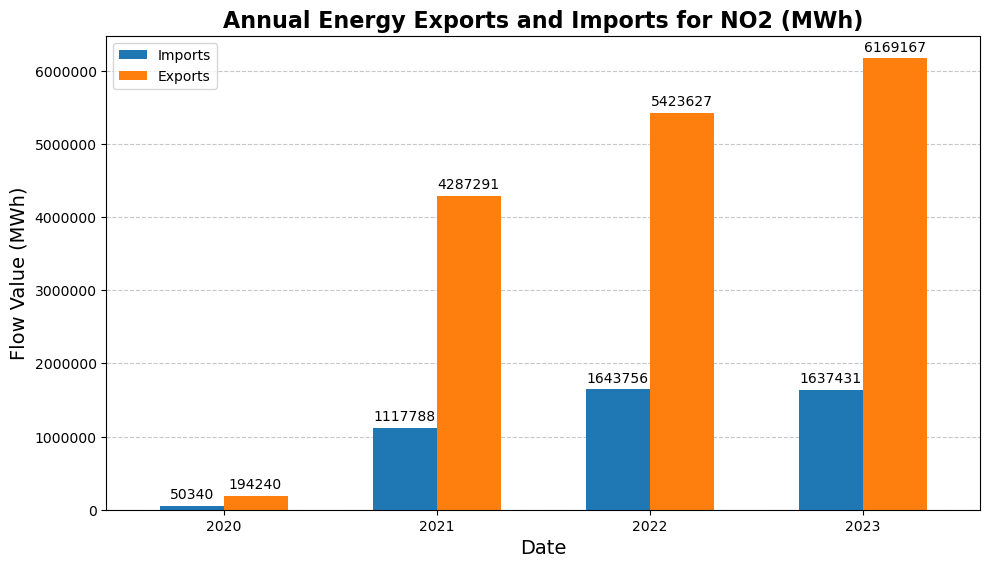

In [5]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
bars = exports_imports[['Imports', 'Exports']].plot(kind='bar', width=0.6, ax=ax)

# Set title and labels
ax.set_title('Annual Energy Exports and Imports for NO2 (MWh)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Flow Value (MWh)', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display only the year on x-axis ticks
ax.set_xticklabels([year.strftime('%Y') for year in exports_imports.index])


# Automatically add data labels for exports and imports
for container in bars.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=10, color='black')

# Remove scientific notation from y-axis
ax.get_yaxis().get_major_formatter().set_scientific(False)

#Setting the horizontal grid-lines below the bars to increase readability
ax.set_axisbelow(True)

# Customize grid and layout
plt.tight_layout()
plt.xticks(rotation=0) #Set ticks to be horizontal rather than vertical

# Save as a high-resolution image
plt.savefig('figure_task3.png', format='png', dpi=300)
plt.show() #No values for 2019, as NordLink had not happened then and trade of power was not possible

### Conclusion
Looking at the bar chart it is visible that exports from NO2 to Germany have consistently been significantly higher than imports to NO2 from Germany. It seems also that the imports from Germany to NO2 have increased at slower pace in comparison to the exports. The amount of imports have even fallen between 2022 and 2023. In comparison, the exports have increased by a far larger amount. The fall in imports from Germany could correlate with the closure of 3 Nuclear Powerplants in April of 2023 reported. Leading to less supply overall. Particularly, it could also mean that there was less consistent energy being imported to NO2 to cover nature-caused falls in energy yield. This is due to more renewable sources in Norway in comparison the now-disused more consistent nuclear plants in Germany.

Sources:

“The Nuclear Phase-out in Germany.” Federal Office for the Safety of Nuclear Waste Management, German Bundesrepublik, 31 Jan. 2024, www.base.bund.de/EN/ns/nuclear-phase-out/nuclear-phase-out_node.html.

## TASK 4
### Creating a Line Chart with Weekly Net Exports from NO2

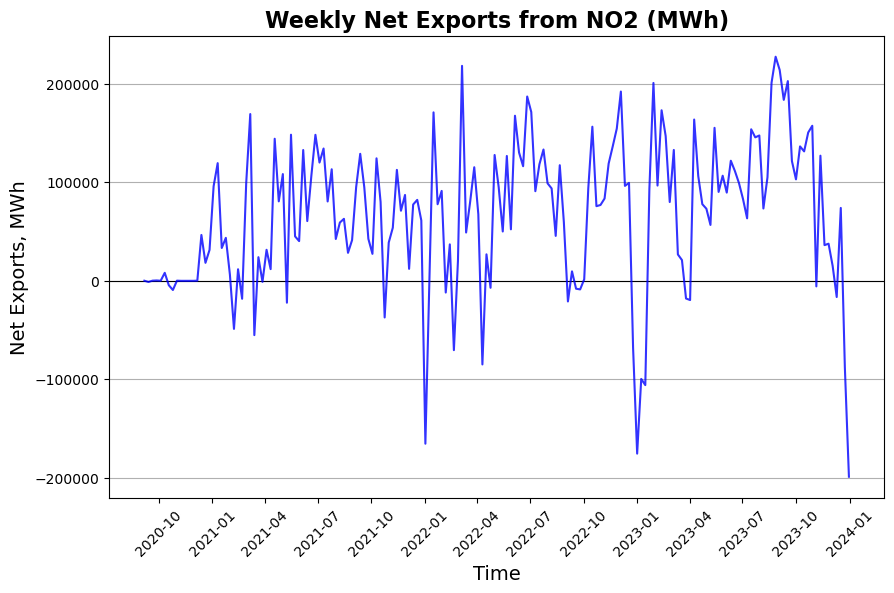

In [6]:
#import dates in order to change x-ticks in timeseries data
import matplotlib.dates as mdates

#Resample the exports and imports by week and then sum them to find the weekly values
weekly_exports = physicalflow_export['FlowValue'].resample('W').sum()
weekly_imports = physicalflow_import['FlowValue'].resample('W').sum()


# Calculate weekly net exports
weekly_netexports = weekly_exports - weekly_imports

# Start the Plot
fig, ax = plt.subplots(figsize=(10, 6)) 

# Horizontal line at y=0
ax.axhline(0, color='black', linestyle='-', label='0', linewidth=0.8)


# Plot weekly net exports line
ax.plot(weekly_netexports.index, weekly_netexports.values, label="Net Exports", color="blue", alpha=0.8) #set alpha to 0.8 to make the zero y-axis somewhat visible increasing clarity

#Set the X-ticks to every quarter as by default it makes a less cluttered y-axis, which is easier to read when looking for seasonal trends
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,4,7,10)))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45) #Rotate Ticks to make them fit

#Plotting the grid and titles of the graph
plt.grid(axis="y")
plt.title("Weekly Net Exports from NO2 (MWh)", fontweight="bold",fontsize=16)
plt.ylabel("Net Exports, MWh",fontsize=14)
plt.xlabel("Time",fontsize=14)
plt.plot()

#Saving figure as "figure_task4.png"
plt.savefig('figure_task4.png', format='png', dpi=400)  # dpi=400 for high resolution, make it so that we use matplotlib 


### Conclusion
Looking at the graph, it is not true that NO2 has always exported more to Germany than vice-versa on a weekly basis. There is clearly weeks where the was a net importing of electricity to NO2, this is indicated in the graph by the data points below y=0.It seems that the net importing of electricty happens often in the winter months, between November to February. This could be due to increased demand for heating in winter and colder temperatures in Norway in comparison to Germany. It can also be a lack of supply in winter, as weather hinders production of hydro-generated energy. Leading to a need for electricity from consistent sources, of which there might be more in Germany. 

## TASK 5
### Creating the Scatter Plot

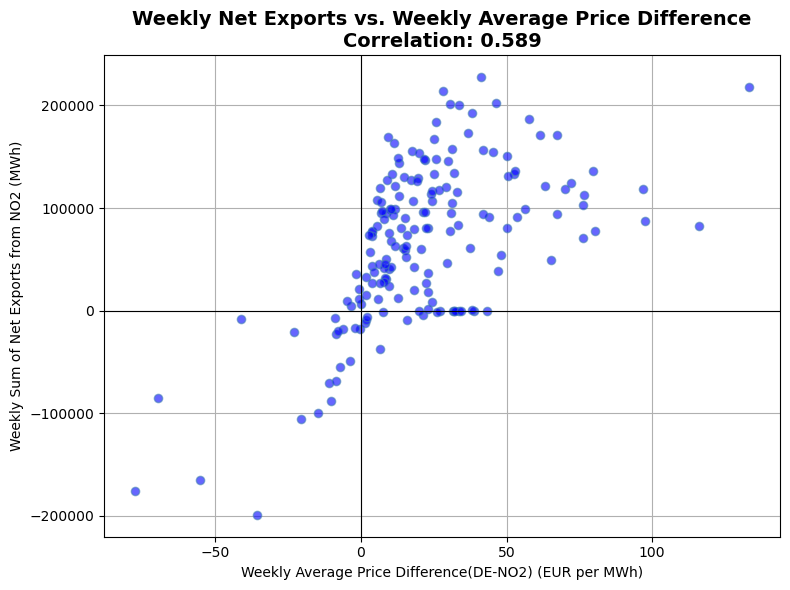

In [7]:
#import relevant modules
import pandas as pd
import matplotlib.pyplot as plt

# First finding average difference, then using resample and mean to find weekly average
price_diff = (dfde['Price'] - dfno['Price']).resample('W').mean()


# Combine both Series into a single DataFrame for plotting and correlation calculation
exports_and_prices = pd.DataFrame({
    'Net Exports': weekly_netexports, #Here the weekly net exports from the previous task is used
    'Price Difference': price_diff 
}).dropna()

# Calculate the correlation coefficient
correlation = exports_and_prices['Net Exports'].corr(exports_and_prices['Price Difference'])

# Set the plot
fig, ax = plt.subplots(figsize=(8, 6))

#Axis lines for clarity
ax.axhline(y=0,lw=0.8,color="black")
ax.axvline(x=0,lw=0.8, color="black")

#Make Scatter Plot
ax.scatter(exports_and_prices['Price Difference'], exports_and_prices['Net Exports'], alpha=0.6,color="blue", edgecolors='steelblue') #Lower Alpha to Make the Scatter Dots more visible

# Add title with correlation coefficient
ax.set_title(f'Weekly Net Exports vs. Weekly Average Price Difference\nCorrelation: {correlation:.3f}', fontsize=14,fontweight="bold")
ax.set_xlabel('Weekly Average Price Difference(DE-NO2) (EUR per MWh)')
ax.set_ylabel('Weekly Sum of Net Exports from NO2 (MWh)')

#Add grid lines below the scatter plot
ax.grid()
ax.set_axisbelow(True) 


#Make more compact size
plt.tight_layout()
plt.savefig('figure_task5.png', format='png', dpi=600)  # dpi=600 for high resolution


# Show plot
plt.show()

The correlation coefficient calculated using the .corr() function was 0.589. This correlation Coefficient indicates a positive relationship between price difference and net exports. This may show that when prices are higher in Germany than in NO2, it acts as an incentive in NO2 to export more energy to Germany. Conversely, when prices are higher in NO2 than Germany, it may act as an incentive as well to German exporters to export more to NO2, causing negative net exports for NO2. Overall there seems to be a positive relationship between a higher price difference and more net exports from NO2 to Germany. 

## Task 6

### Use of Sources

In completing the assignment, we utilized various online resources to complete the tasks and bug fix. 

We frequently used the official documentation of Pandas for guidance on implementing specific functions. For example, the documentation helped us understand how to use the 'resample()' funtion and the 'loc()' function. Particularly when understanding what parameters are needed for what functions. We also used the matplotlib documentaton for the various ways of plotting, and ways to edit and enhance the plots. 


We also used online resources, particularly when trying to understand how to build specific types of code. For example we looked at StackOverflow to understand how the glob function worked. Additionaly we used online resources such as GeekforGeeks, or W3 schools when trying to find specific functions. We also used StackOverflow when finding solutions to challenges which we were facing, such as how to load data to an excel file. We also used online resources to find solutions to problems which we did not know before, for example we did not know about matplotlib.dates making it easier to simplify the xticks in time series data. But after looking at previous people on forums who had similar problems to solve, we found out about this module then utilized other sources to learn more about it. 


Generative AI was also used by us in attempting to understand the different methods in the different modules, particularly pandas. We noticed that the explanations on pandas for the functions such as groupby(), where sometimes difficult to understand as they used technical terms. This is why we used AI such as ChatGPT as it was able to explain how specific functions and other types of code worked in a more natural language. 

Debugging was also an example where we consulted a number of sources. Many times the reason why our code was not working was not clear at first. For example we had issues with the data paths of the files being not parsed correctly by the read_csv() function, to solve this we first looked at other examples on the internet of data being loaded from a seperate data folder and also consulted AI by pasting in our data path to see if there were any syntax errors we did not notice. AI was particularly useful when our issues were too specifc to have been encountered before on StackOverflow or other forums. However, we tended to favor StackOverflow or GeekforGeeks as a first choice when trying to understand code and solving problems.

We also used sources when looking for more general information such as how to make plotting more efficient. Especially with the large data sets we were using.


We also sought advice on optimizing a function for better performance and lower runtime. ChatGPT provided us with general strategies and certain concrete changes we could impliment in order to reduce the runtime. An example of such a change was to impliment 

'd = d[(d['ResolutionCode'] == 'PT60M') & (d['MapCode'].isin(['NO2', 'DE_LU']))]'

in the for loop in task 1. This was particularly useful as the specific syntax accepted by pandas was not clear at first. Particularly how to format the "&" statements as conditions when filtering data. 

Throughout the assignment we have ensured that the use of AI or others work were used to enhance our understanding and efficiency, and that the core code remains our own. We believe that using these online resources have deepened our understanding of our code, pandas and using python for data analysis. We tried as much as possible not to copy and paste from these online resources as by coding it ourselves we had a more deep understanding of the different variables and how the code works. Overall we have been very careful to use these tools ethically and resposibly.